In [27]:
import pandas as pd
import numpy as np
import seaborn as sns


In [25]:
df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/WhiteWineQuality.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


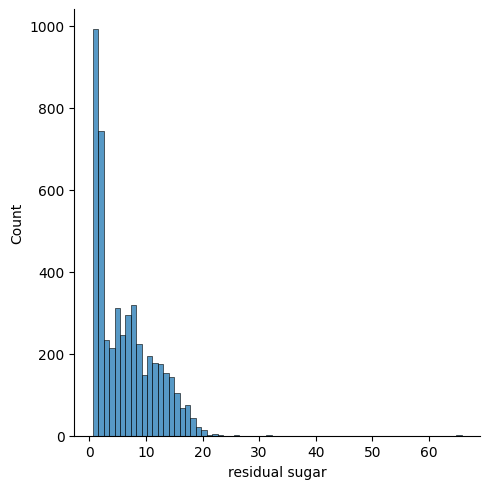

In [30]:
sns.displot(df['residual sugar']);

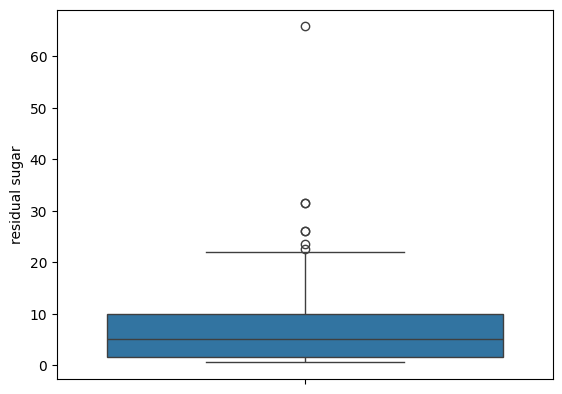

In [32]:
sns.boxplot(df['residual sugar']);

#**Z-Score method to treat Outlier**

In [34]:
upper_limit= df['residual sugar'].mean()+ 3*df['residual sugar'].std()
lower_limit= df['residual sugar'].mean()- 3*df['residual sugar'].std()
print('upperlimit:',upper_limit)
print('lowerlimit:', lower_limit)

upperlimit: 21.607588215254115
lowerlimit: -8.824758488835169


**Find the outliers**

In [37]:
outliers= df.loc[(df['residual sugar']> upper_limit) | (df['residual sugar']< lower_limit)]
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
182,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
191,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5


**Method. 1**

In [46]:
# Trimming: delete the outlier data
new_df= df.loc[(df['residual sugar']< upper_limit) & (df['residual sugar'] > lower_limit)]
print('After removing outlier:' ,len(new_df))
print('Before removing outlier:',len(df))
print('Outliers:', len(outliers))


After removing outlier: 4889
Before removing outlier: 4898
Outliers: 9


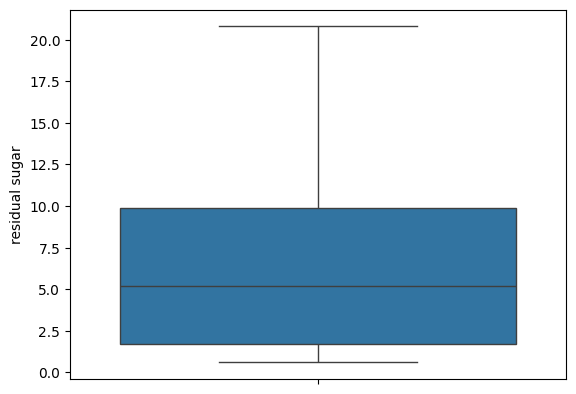

In [48]:
sns.boxplot(new_df['residual sugar']);

**Method. 2**

In [49]:
# Capping: Change the outlier to upper limit or lower limit values

new_df= df.copy()
new_df.loc[new_df['residual sugar']> upper_limit, 'residual sugar']= upper_limit
new_df.loc[new_df['residual sugar']< lower_limit, 'residual sugar']= lower_limit

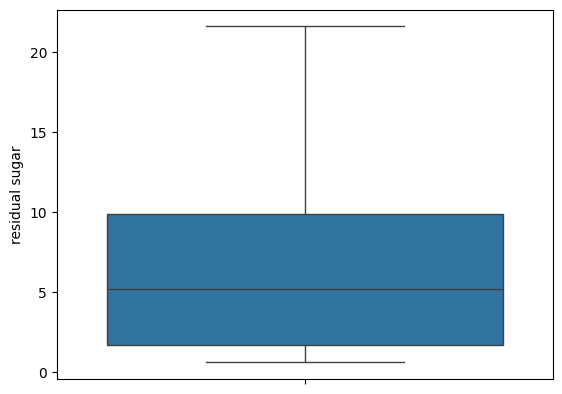

In [50]:
sns.boxplot(new_df['residual sugar']);

#**IQR Method**

In [54]:
q1= df['residual sugar'].quantile(0.25)
q3= df['residual sugar'].quantile(0.75)
iqr= q3-q1
print(q1)
print(q3)
print(iqr)

1.7
9.9
8.200000000000001


In [58]:
upper_limit= q3 +(1.5 * iqr)
lower_limit= q1 -(1.5 * iqr)
print(lower_limit)
print(upper_limit)

-10.600000000000001
22.200000000000003


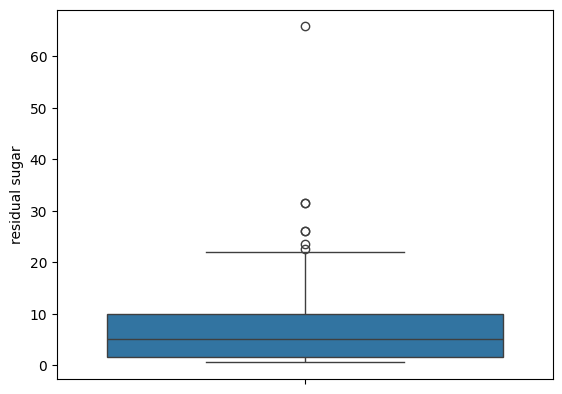

In [60]:
sns.boxplot(df['residual sugar']);

In [62]:
outliers= df.loc[(df['residual sugar']> upper_limit) | (df['residual sugar']< lower_limit)]


In [63]:
# Trim the data
new_df= df.loc[(df['residual sugar']< upper_limit) & (df['residual sugar'] > lower_limit)]
print('After removing outlier:' ,len(new_df))
print('Before removing outlier:',len(df))
print('Outliers:', len(outliers))


After removing outlier: 4891
Before removing outlier: 4898
Outliers: 7


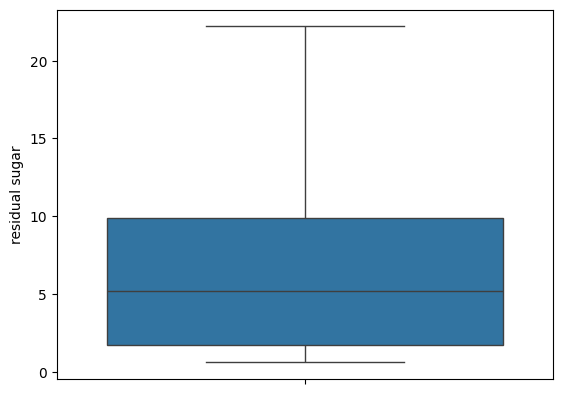

In [65]:
sns.boxplot(new_df['residual sugar']);

In [66]:
# Capping: Change the outlier to upper limit or lower limit values

new_df= df.copy()
new_df.loc[new_df['residual sugar']> upper_limit, 'residual sugar']= upper_limit
new_df.loc[new_df['residual sugar']< lower_limit, 'residual sugar']= lower_limit

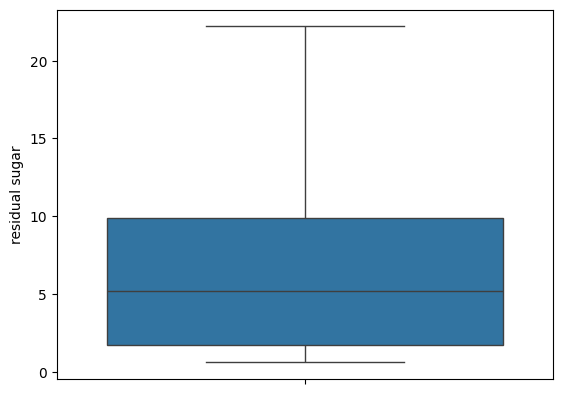

In [67]:
sns.boxplot(new_df['residual sugar']);

#**Percentile Method**

In [68]:
upper_limit= df['residual sugar'].quantile(0.99)
lower_limit= df['residual sugar'].quantile(0.01)
print(lower_limit)
print(upper_limit)

0.9
18.8


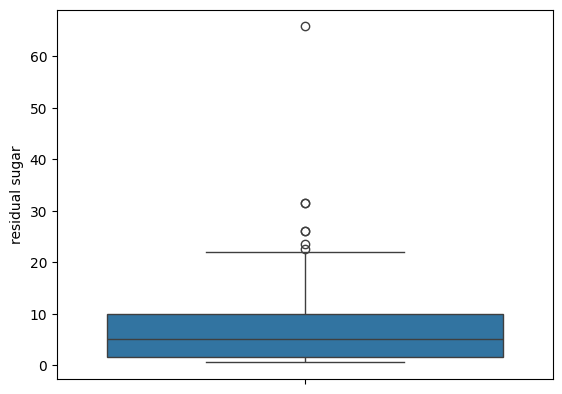

In [70]:
sns.boxplot(df['residual sugar']);

In [71]:
# find the outliers

outliers= df.loc[(df['residual sugar']> upper_limit) | (df['residual sugar']< lower_limit)]


In [73]:
# Trim the data
new_df= df.loc[(df['residual sugar']<= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('After removing outlier:' ,len(new_df))
print('Before removing outlier:',len(df))
print('Outliers:', len(outliers))

After removing outlier: 4817
Before removing outlier: 4898
Outliers: 81


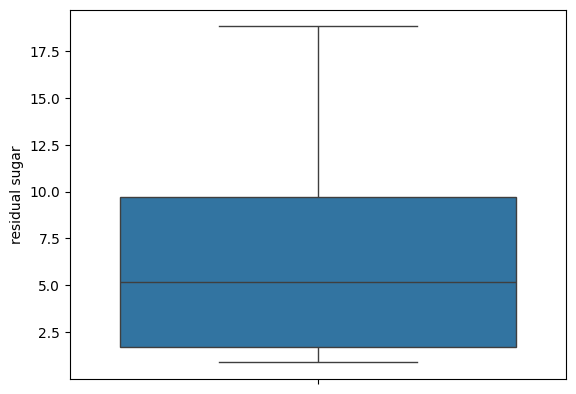

In [76]:
sns.boxplot(new_df['residual sugar']);

In [77]:
# Capping: Change the outlier to upper limit or lower limit values

new_df= df.copy()
new_df.loc[new_df['residual sugar']> upper_limit, 'residual sugar']= upper_limit
new_df.loc[new_df['residual sugar']< lower_limit, 'residual sugar']= lower_limit

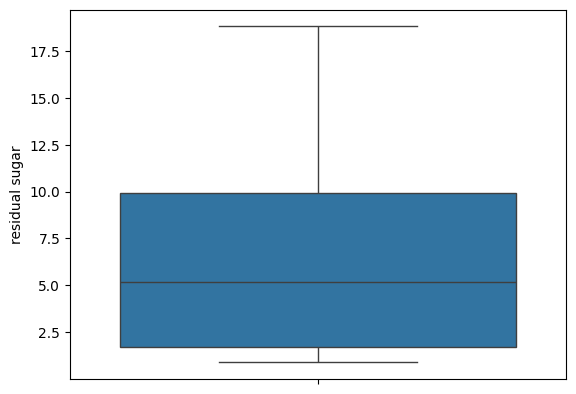

In [79]:
sns.boxplot(new_df['residual sugar']);

In [83]:
import warnings
warnings.filterwarnings("ignore")

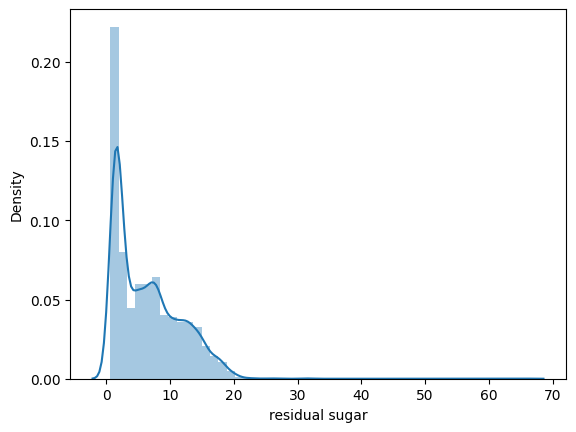

In [86]:
# we can see alot of outliers here

sns.distplot(df['residual sugar']);

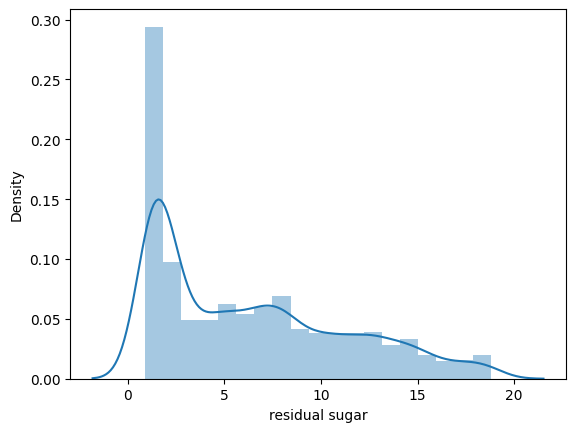

In [87]:
# After outlier treatment

sns.distplot(new_df['residual sugar']);